In [9]:
# Reading Essential Libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Directories
general_directory = '/Users/ManuelSolis/OneDrive - Rove Marketing/Documents/AgTech/Python/'
precip_directory = 'july_2023_precip_sum.csv'
rm_gis_directory = 'rm_geo_json.geojson'
rm_yields_directory='rm_yields_2004_2023_weighted_avg.csv'

# Loading datasets
df_precip = pd.read_csv(general_directory+precip_directory)
df_yield = pd.read_csv(general_directory+rm_yields_directory)
gdf_rm = gpd.read_file(general_directory+rm_gis_directory)

In [11]:
# Finding historical mean and std for each rm for Feature Engineering
df_yield_agg=df_yield.drop(columns='Year').groupby(['Matched_RM', 'Crop']).agg(['mean', 'std'])
# Renaming Columns
df_yield_agg.columns=['_'.join(col).strip() for col in df_yield_agg.columns]
# Resetting index
df_yield_final=df_yield_agg.reset_index()
# Dropping FIELD PEAS
df_yield_final=df_yield_final[df_yield_final['Crop']!='FIELD PEAS'].set_index(['Matched_RM', 'Crop'])
df_yield_final=df_yield_final.reset_index()
# Dropping Null values if there is any
#df_yield_final=df_yield_final.dropna()




In [21]:
#Is there any correlation with July Precipitation?
df_yield_finalp=pd.merge(df_yield_final,df_precip,on='Matched_RM').drop(columns=['Period','Year']).rename(columns={'precip':'precip_Jul2023'})
df_yield_finalp
df_yield_finalp[df_yield_finalp['Crop']=='BARLEY']['precip_Jul2023']

1      46.406015
5      41.848980
9      27.387097
13     39.192308
17     60.325758
         ...    
339    21.993333
343    37.660000
347    67.983333
354    42.029412
358    26.202381
Name: precip_Jul2023, Length: 88, dtype: float64

PearsonRResult(statistic=-0.27898477434892216, pvalue=0.008484131322097443)
PearsonRResult(statistic=-0.26638239649072054, pvalue=0.011154120232033961)


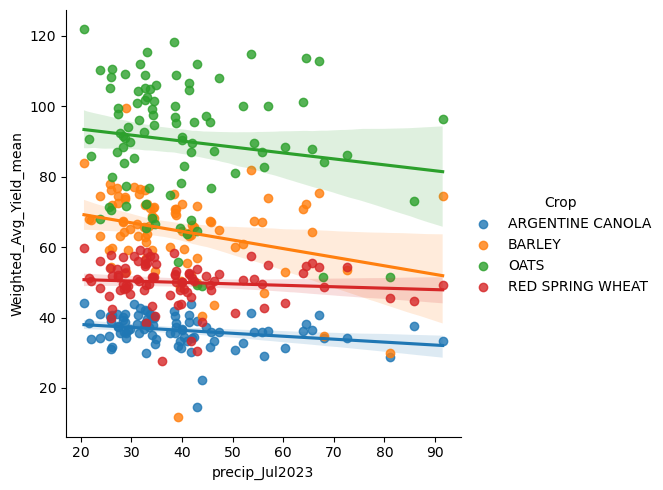

In [37]:
sns.lmplot(x="precip_Jul2023", y="Weighted_Avg_Yield_mean", hue="Crop", data=df_yield_finalp)
corr_OATS=stats.pearsonr(df_yield_finalp[df_yield_finalp['Crop']=='OATS']['precip_Jul2023'], df_yield_finalp[df_yield_finalp['Crop']=='OATS']['Weighted_Avg_Yield_mean'])
corr_BARLEY=stats.pearsonr(df_yield_finalp[df_yield_finalp['Crop']=='BARLEY']['precip_Jul2023'], df_yield_finalp[df_yield_finalp['Crop']=='BARLEY']['Weighted_Avg_Yield_mean'])
corr_WHEAT=stats.pearsonr(df_yield_finalp[df_yield_finalp['Crop']=='RED SPRING WHEAT']['precip_Jul2023'], df_yield_finalp[df_yield_finalp['Crop']=='RED SPRING WHEAT']['Weighted_Avg_Yield_mean'])
corr_CANOLA=stats.pearsonr(df_yield_finalp[df_yield_finalp['Crop']=='ARGENTINE CANOLA']['precip_Jul2023'], df_yield_finalp[df_yield_finalp['Crop']=='ARGENTINE CANOLA']['Weighted_Avg_Yield_mean'])

print(corr_BARLEY)
print(corr_CANOLA)